In [100]:
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [9]:
from Company_Valuation.data import get_data
from Company_Valuation.utils import vectorize

# Prepare Data

In [2]:
df = get_data()

df_vect = vectorize(df)

In [80]:
X = df_vect[['ebitda','returnOnCapitalEmployed', 'ebitda_margin','growth_rate', 'size']]
y = df_vect['enterpriseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pipeline

In [93]:
def pipeline(model):
    num_transformer = Pipeline([('imputer', SimpleImputer()),
                                    ('scaler', RobustScaler())])
    # Preprocessor
    preprocessor = ColumnTransformer([
        ('num_transformer', num_transformer, ['size','returnOnCapitalEmployed','ebitda', 'growth_rate', 'ebitda_margin']),
        ('cat_transformer', OneHotEncoder(), [])],
        remainder='passthrough')


    # Combine preprocessor and linear model in pipeline
    final_pipe = Pipeline([
        ('preprocessing', preprocessor),
        (f'{model}', model)])
    return final_pipe

# Predict Median/Mean Baseline

In [110]:
median = y.median()

median_pred = np.full((939,), median)

median_score = mean_absolute_error(y_test, median_pred)
median_score

8757.13737242966

In [111]:
mean = y.mean()

mean_pred = np.full((939,), mean)

mean_score = mean_absolute_error(y_test, mean_pred)
mean_score

12141.767957622353

# Base model Scores

In [84]:
results = {}

predictions = []

models = [Ridge(), Lasso(), LinearRegression(), SVR(), KNeighborsRegressor(), RandomForestRegressor()]

for model in models:
    pipe = pipeline(model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    predictions.append(y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model] = mae
    print(f'Done {model}')

Done Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Done Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Done LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Done SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Done KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Done RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
          

In [85]:
results

{Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001): 7270.43409002412,
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False): 7270.5397694571175,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): 7271.017905924498,
 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False): 8687.177840558552,
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'): 5066.276463765571,
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=

# Predictions

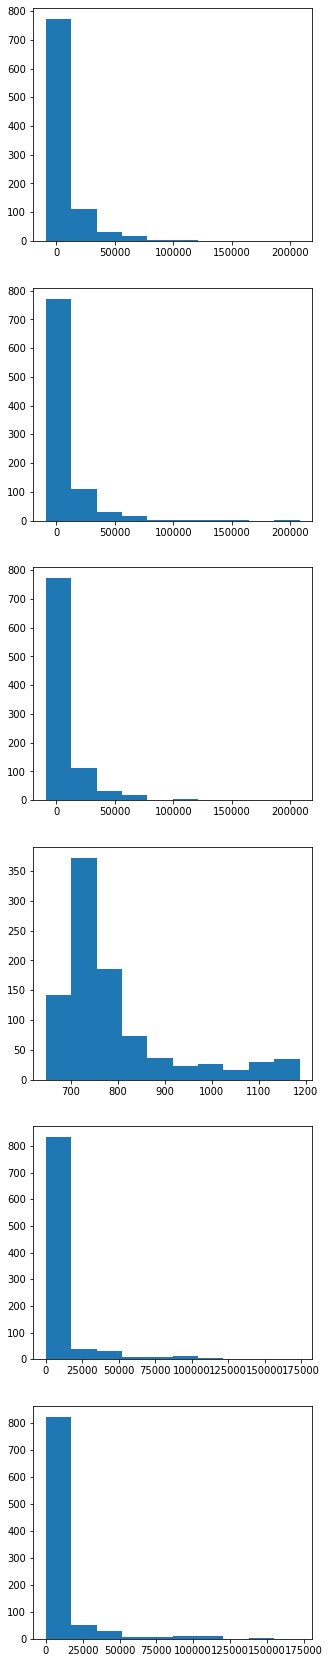

In [86]:
fig, axs = plt.subplots(6,1, figsize=(5, 30))
counter = 0
for pred in predictions:
    axs[counter].hist(pred)
    counter += 1